In [1]:
# importing libraries for data exploration and preprocessing

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
data = pd.read_csv('loan_data.csv')

/var/folders/xc/lv3qzhn57bsbzgbsx36j57d00000gn/T/ipykernel_58417/1593645552.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('loan_data.csv')


In [3]:
# check number of columns and data types of features

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [4]:
# create a new column based on the loan_status column that will be our target variable
data['good_bad'] = np.where(data.loc[:, 'loan_status'].isin(['Charged Off', 'Default', 'Late (31-120 days)',
                                                                       'Does not meet the credit policy. Status:Charged Off']), 0, 1)
# Drop the original 'loan_status' column
data.drop(columns = ['loan_status'], inplace = True)

In [5]:
# display first 10 rows
data.head(10)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,good_bad
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
5,5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
6,6,1069639,1304742,7000,7000,7000.0,60 months,15.96,170.08,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
7,7,1072053,1288686,3000,3000,3000.0,36 months,18.64,109.43,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
8,8,1071795,1306957,5600,5600,5600.0,60 months,21.28,152.39,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
9,9,1071570,1306721,5375,5375,5350.0,60 months,12.69,121.45,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [6]:
#show columns that have more than 70% missing values
missing_values = data.isnull().mean()
missing_values[missing_values>0.7]

desc                           0.729815
mths_since_last_record         0.865666
mths_since_last_major_derog    0.787739
annual_inc_joint               1.000000
dti_joint                      1.000000
verification_status_joint      1.000000
open_acc_6m                    1.000000
open_il_6m                     1.000000
open_il_12m                    1.000000
open_il_24m                    1.000000
mths_since_rcnt_il             1.000000
total_bal_il                   1.000000
il_util                        1.000000
open_rv_12m                    1.000000
open_rv_24m                    1.000000
max_bal_bc                     1.000000
all_util                       1.000000
inq_fi                         1.000000
total_cu_tl                    1.000000
inq_last_12m                   1.000000
dtype: float64

In [7]:
#droppng of irrelevant columns and rows with missing values
columns_to_drop = ['Unnamed: 0','id', 'member_id', 'sub_grade', 'emp_title', 'url', 'desc', 'title', 'zip_code', 'next_pymnt_d',
                          'recoveries', 'collection_recovery_fee', 'total_rec_prncp', 'total_rec_late_fee', 'desc', 'mths_since_last_record',
                  'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_il_6m',
                  'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m',
                  'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m','policy_code',]
data.drop(columns=columns_to_drop, inplace=True, axis=1)
#dropping all missing values
data.dropna(inplace=True)

In [8]:
# check shape again
data.shape

(181686, 41)

(array([ 0.5,  2.5,  4.5,  6.5,  8.5, 10.5, 12.5, 14.5, 16.5, 18.5, 20.5,
        22.5, 24.5, 26.5]),
 [Text(0, 0.5, 'loan_amnt'),
  Text(0, 2.5, 'funded_amnt_inv'),
  Text(0, 4.5, 'installment'),
  Text(0, 6.5, 'dti'),
  Text(0, 8.5, 'inq_last_6mths'),
  Text(0, 10.5, 'open_acc'),
  Text(0, 12.5, 'revol_bal'),
  Text(0, 14.5, 'total_acc'),
  Text(0, 16.5, 'out_prncp_inv'),
  Text(0, 18.5, 'total_pymnt_inv'),
  Text(0, 20.5, 'last_pymnt_amnt'),
  Text(0, 22.5, 'acc_now_delinq'),
  Text(0, 24.5, 'tot_cur_bal'),
  Text(0, 26.5, 'good_bad')])

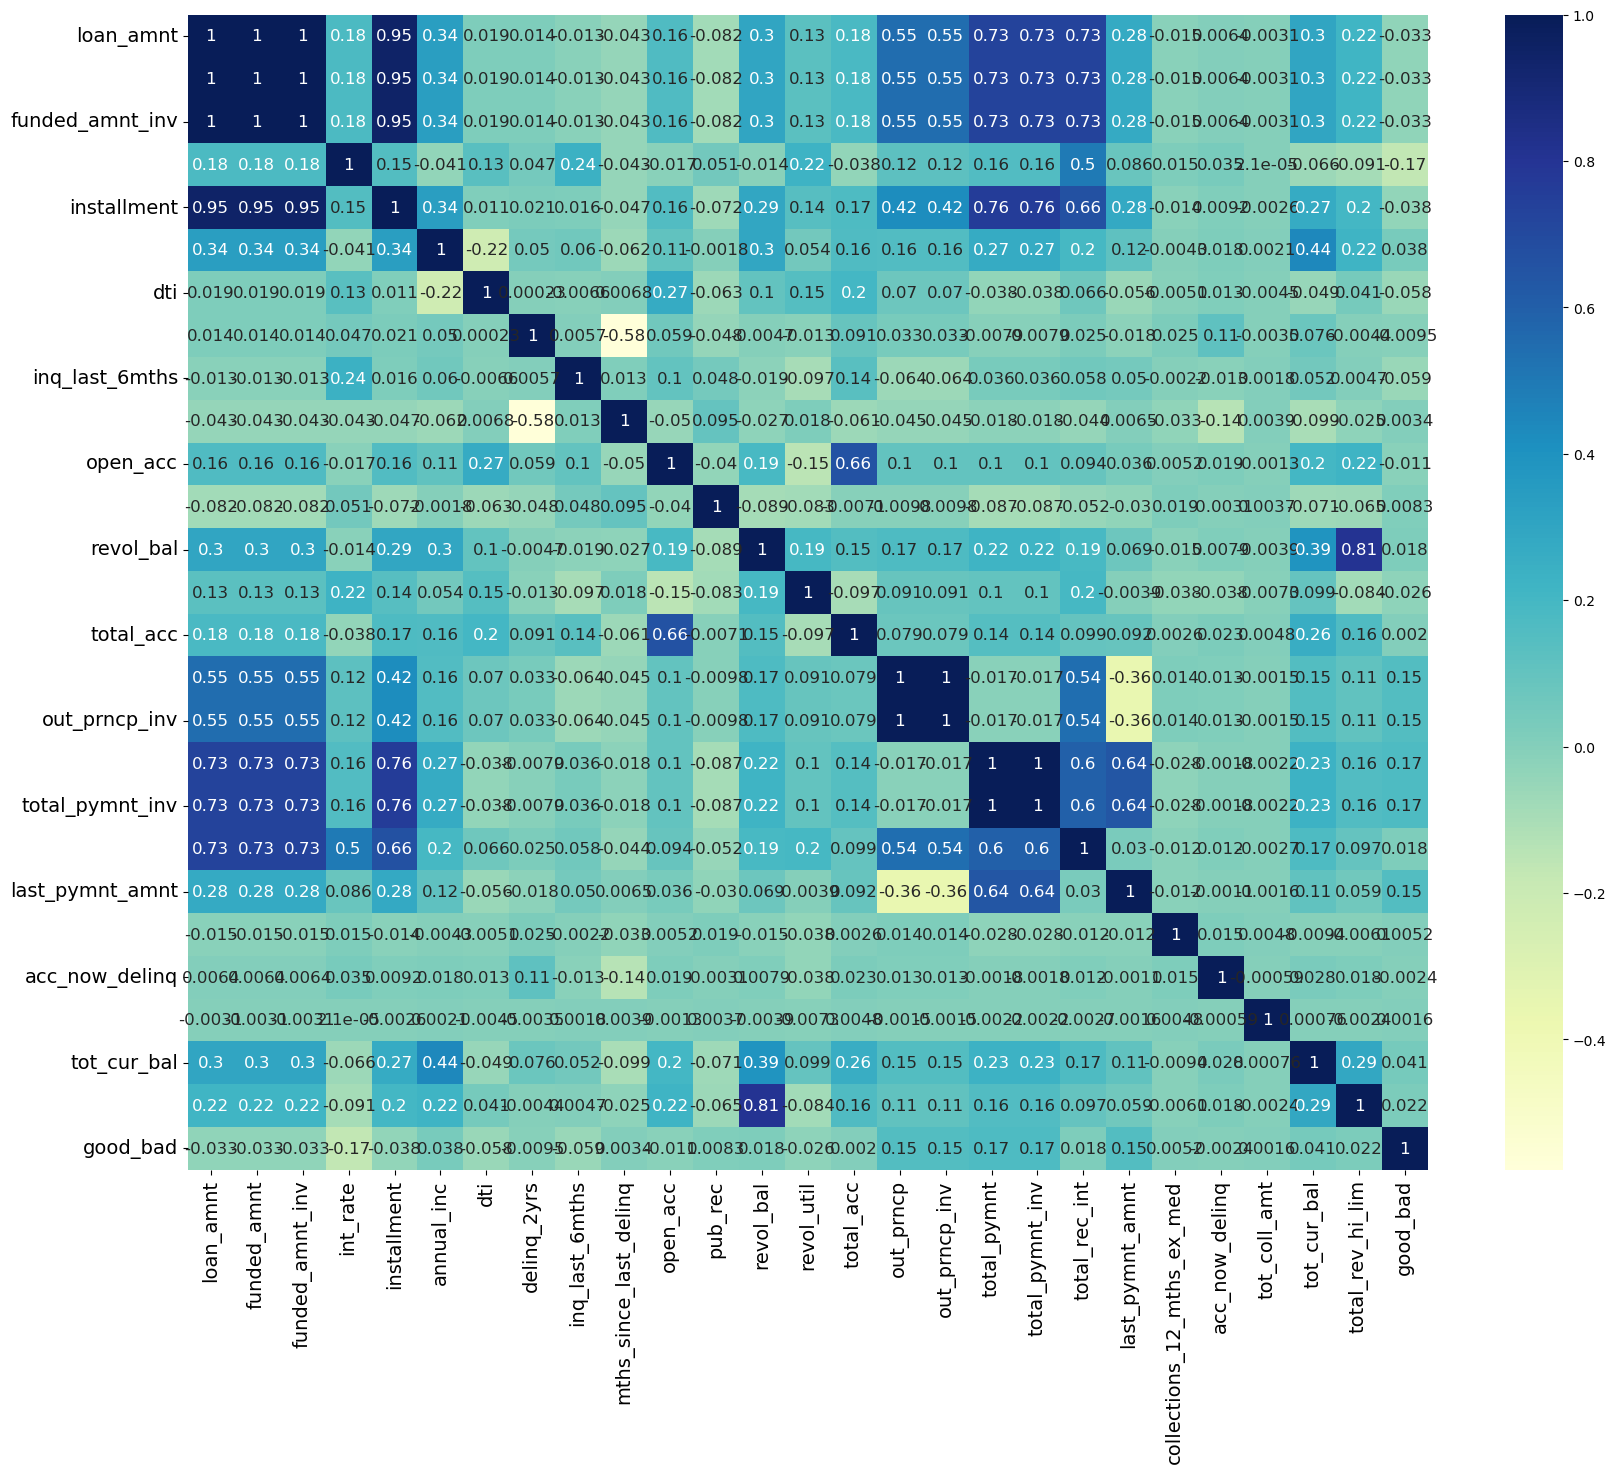

In [9]:
# correlation matrix showing correlation co-effiecients 
corr_matrix = data.corr()
heatMap=sns.heatmap(corr_matrix, annot=True,  cmap="YlGnBu", annot_kws={'size':12})
heatmap=plt.gcf()
heatmap.set_size_inches(20,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


In [10]:
# droping multicollinear features 
data.drop(columns=['loan_amnt', 'revol_bal', 'funded_amnt', 'funded_amnt_inv', 'installment',  'total_pymnt_inv',  'out_prncp_inv',  'total_acc'], inplace=True)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5]),
 [Text(0, 0.5, 'int_rate'),
  Text(0, 1.5, 'annual_inc'),
  Text(0, 2.5, 'dti'),
  Text(0, 3.5, 'delinq_2yrs'),
  Text(0, 4.5, 'inq_last_6mths'),
  Text(0, 5.5, 'mths_since_last_delinq'),
  Text(0, 6.5, 'open_acc'),
  Text(0, 7.5, 'pub_rec'),
  Text(0, 8.5, 'revol_util'),
  Text(0, 9.5, 'out_prncp'),
  Text(0, 10.5, 'total_pymnt'),
  Text(0, 11.5, 'total_rec_int'),
  Text(0, 12.5, 'last_pymnt_amnt'),
  Text(0, 13.5, 'collections_12_mths_ex_med'),
  Text(0, 14.5, 'acc_now_delinq'),
  Text(0, 15.5, 'tot_coll_amt'),
  Text(0, 16.5, 'tot_cur_bal'),
  Text(0, 17.5, 'total_rev_hi_lim'),
  Text(0, 18.5, 'good_bad')])

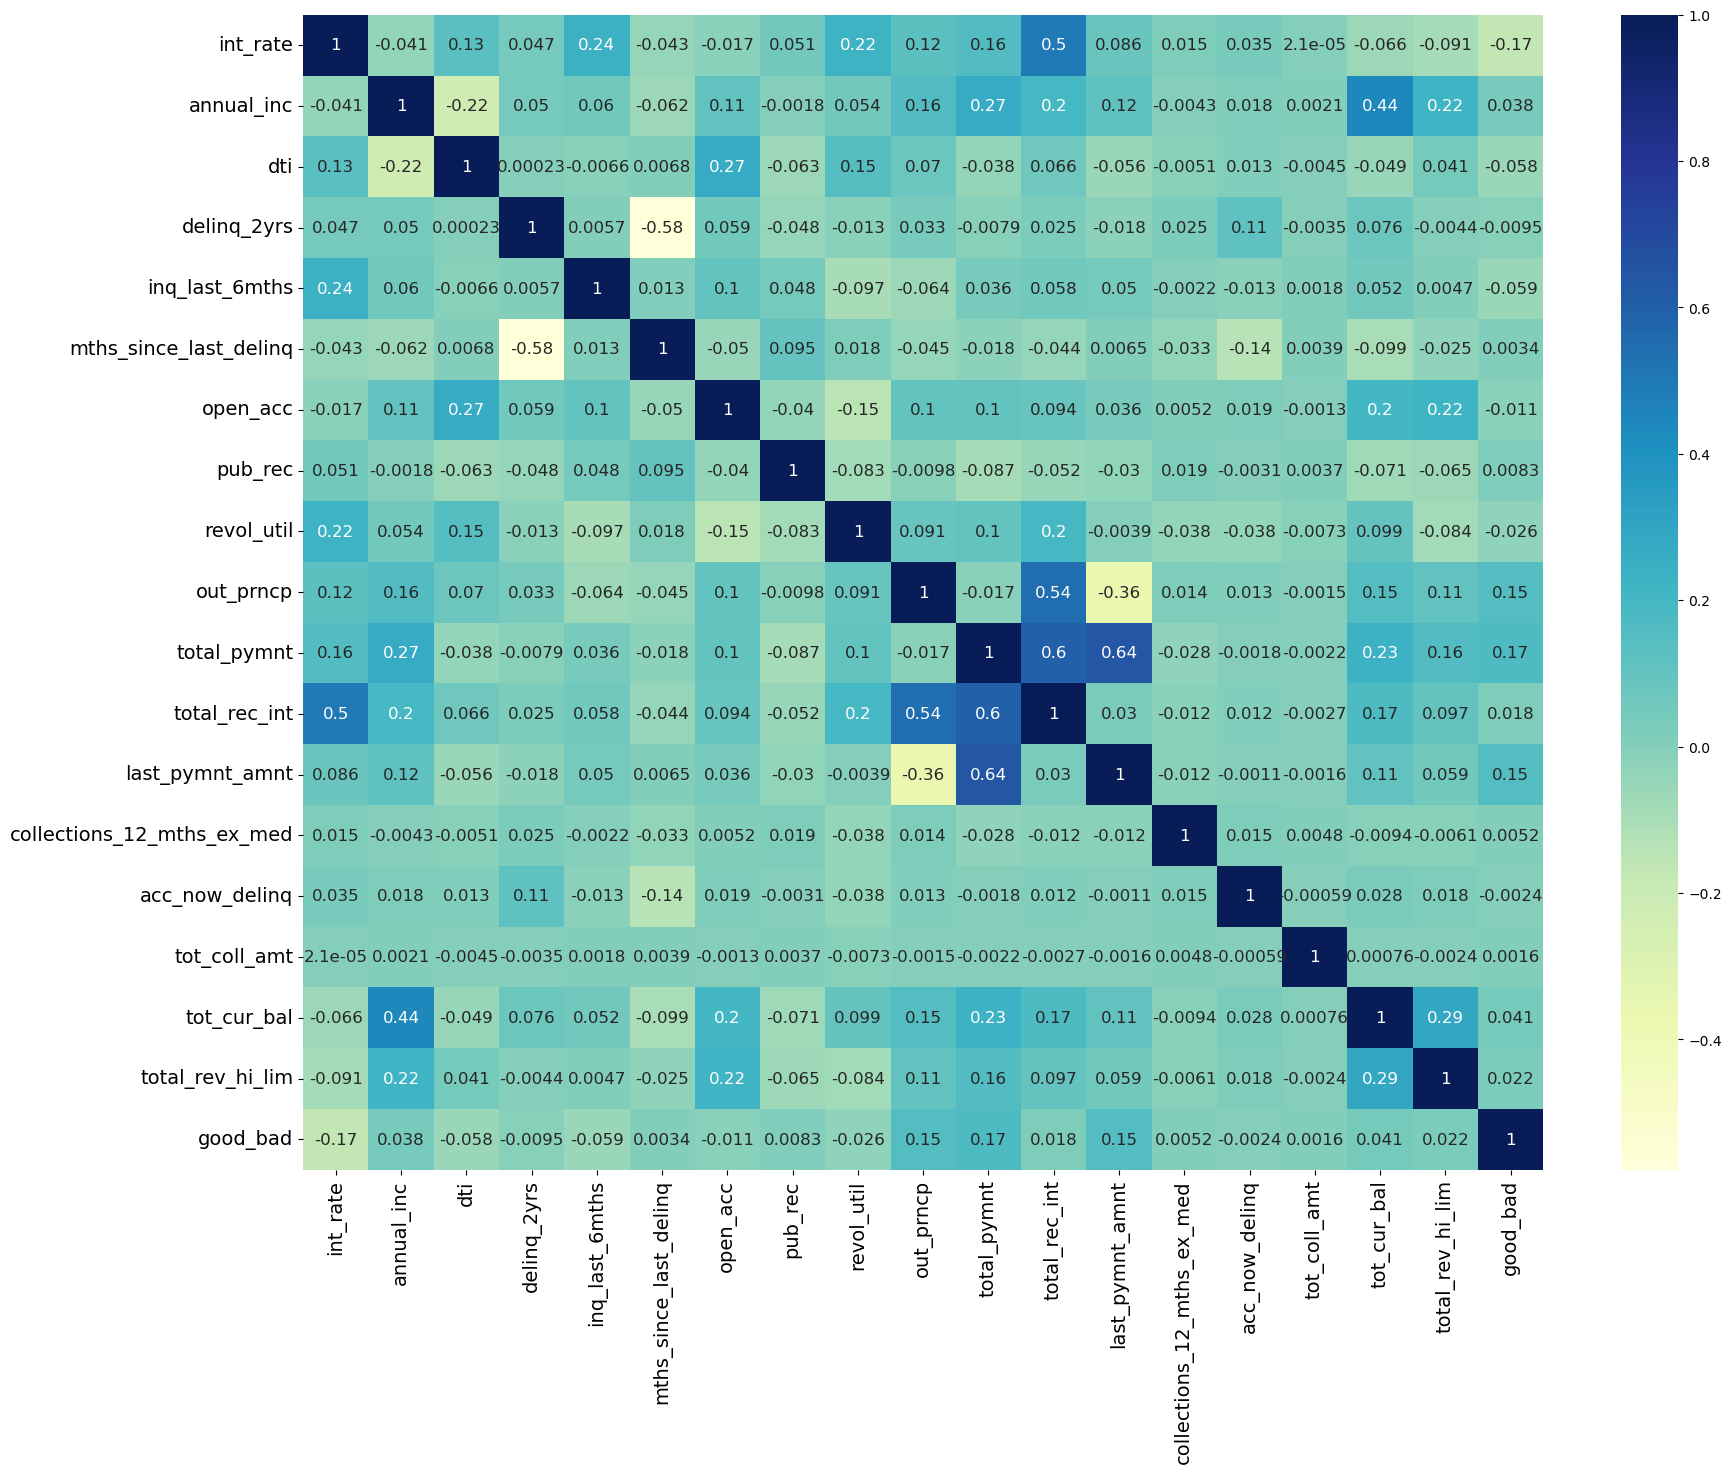

In [11]:
corr_matrix = data.corr()
heatMap=sns.heatmap(corr_matrix, annot=True,  cmap="YlGnBu", annot_kws={'size':12})
heatmap=plt.gcf()
heatmap.set_size_inches(20,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

In [12]:
data.shape

(181686, 33)

In [13]:
#check datatypes of data again

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181686 entries, 42537 to 466284
Data columns (total 33 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   term                        181686 non-null  object 
 1   int_rate                    181686 non-null  float64
 2   grade                       181686 non-null  object 
 3   emp_length                  181686 non-null  object 
 4   home_ownership              181686 non-null  object 
 5   annual_inc                  181686 non-null  float64
 6   verification_status         181686 non-null  object 
 7   issue_d                     181686 non-null  object 
 8   pymnt_plan                  181686 non-null  object 
 9   purpose                     181686 non-null  object 
 10  addr_state                  181686 non-null  object 
 11  dti                         181686 non-null  float64
 12  delinq_2yrs                 181686 non-null  float64
 13  earliest_c

In [14]:
# converting emp_length to numerical column and assign nan values to zero

def emp_length_convert(df, column):
    df[column] = df[column].str.replace('\+ years', '')
    df[column] = df[column].str.replace('< 1 year', str(0))
    df[column] = df[column].str.replace(' years', '')
    df[column] = df[column].str.replace(' year', '')
    df[column] = pd.to_numeric(df[column])
    df[column].fillna(value = 0, inplace = True)
    

emp_length_convert(data, 'emp_length')

data['emp_length'].unique()

/var/folders/xc/lv3qzhn57bsbzgbsx36j57d00000gn/T/ipykernel_58417/2467710.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df[column] = df[column].str.replace('\+ years', '')


array([10,  2,  4,  7,  6,  5,  8,  3,  1,  0,  9])

In [15]:
data['emp_length'].dtype

dtype('int64')

In [16]:
# converting term column to numeric data type

def term_numeric(df, column):
    df[column] = pd.to_numeric(df[column].str.replace(' months', ''))
    
term_numeric(data, 'term')

In [17]:
data['term'].dtype

dtype('int64')

In [18]:
# preprocessing date columns 

def date_columns(df, column):
    # store current month
    today_date = pd.to_datetime('2020-08-01')
    # convert to datetime format
    df[column] = pd.to_datetime(df[column], format = "%b-%y")
    # calculate the difference in months and add to a new column
    df['mths_since_' + column] = round(pd.to_numeric((today_date - df[column]) / np.timedelta64(1, 'M')))
    # make any resulting -ve values to be equal to the max date
    df['mths_since_' + column] = df['mths_since_' + column].apply(lambda x: df['mths_since_' + column].max() if x < 0 else x)
    # drop the original date column
    df.drop(columns = [column], inplace = True)
    

date_columns(data, 'issue_d')
date_columns(data, 'last_pymnt_d')
date_columns(data, 'last_credit_pull_d')
date_columns(data, 'earliest_cr_line')

In [19]:
# checking for missing values again 

missing_values = data.isnull().sum()
missing_values[missing_values>0]/len(data)

Series([], dtype: float64)

In [20]:
# seperating categorical features from numerical
categorical_features = data.select_dtypes(exclude='number')
numerical_features = data.select_dtypes(exclude='object')

In [21]:
#checking categorical features data types
categorical_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181686 entries, 42537 to 466284
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   grade                181686 non-null  object
 1   home_ownership       181686 non-null  object
 2   verification_status  181686 non-null  object
 3   pymnt_plan           181686 non-null  object
 4   purpose              181686 non-null  object
 5   addr_state           181686 non-null  object
 6   initial_list_status  181686 non-null  object
 7   application_type     181686 non-null  object
dtypes: object(8)
memory usage: 12.5+ MB


In [22]:
#checking numerical features data types
numerical_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181686 entries, 42537 to 466284
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   term                           181686 non-null  int64  
 1   int_rate                       181686 non-null  float64
 2   emp_length                     181686 non-null  int64  
 3   annual_inc                     181686 non-null  float64
 4   dti                            181686 non-null  float64
 5   delinq_2yrs                    181686 non-null  float64
 6   inq_last_6mths                 181686 non-null  float64
 7   mths_since_last_delinq         181686 non-null  float64
 8   open_acc                       181686 non-null  float64
 9   pub_rec                        181686 non-null  float64
 10  revol_util                     181686 non-null  float64
 11  out_prncp                      181686 non-null  float64
 12  total_pymnt               

In [23]:
data.columns.to_list()

['term',
 'int_rate',
 'grade',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'pymnt_plan',
 'purpose',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'open_acc',
 'pub_rec',
 'revol_util',
 'initial_list_status',
 'out_prncp',
 'total_pymnt',
 'total_rec_int',
 'last_pymnt_amnt',
 'collections_12_mths_ex_med',
 'application_type',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim',
 'good_bad',
 'mths_since_issue_d',
 'mths_since_last_pymnt_d',
 'mths_since_last_credit_pull_d',
 'mths_since_earliest_cr_line']

In [24]:
# Selecting the columns in the desired order for further processing
new_columns = ['grade', 'home_ownership', 'verification_status', 'pymnt_plan', 'purpose', 'addr_state', 'initial_list_status', 'application_type'] + \
              list(data.columns.difference(['grade', 'home_ownership', 'verification_status', 'pymnt_plan', 'purpose', 'addr_state', 'initial_list_status', 'application_type', 'good_bad'])) + \
              ['good_bad']
# Reordering the columns
df = data[new_columns]

In [25]:
df

,grade,home_ownership,verification_status,pymnt_plan,purpose,addr_state,initial_list_status,application_type,acc_now_delinq,annual_inc,...,out_prncp,pub_rec,revol_util,term,tot_coll_amt,tot_cur_bal,total_pymnt,total_rec_int,total_rev_hi_lim,good_bad
42537,A,MORTGAGE,Not Verified,n,debt_consolidation,CT,w,INDIVIDUAL,0.0,105000.0,...,4266.62,0.0,21.6,36,0.0,267646.0,8842.800000,1109.42,61100.0,1
42538,B,RENT,Source Verified,n,debt_consolidation,NM,w,INDIVIDUAL,0.0,40000.0,...,0.00,2.0,68.8,36,15386.0,13605.0,13359.770000,1359.78,8100.0,1
42539,A,MORTGAGE,Not Verified,n,debt_consolidation,FL,w,INDIVIDUAL,0.0,63000.0,...,5449.27,0.0,74.2,36,1514.0,272492.0,11431.200000,1880.47,15400.0,1
42541,B,RENT,Not Verified,n,debt_consolidation,NC,f,INDIVIDUAL,0.0,88000.0,...,5274.10,1.0,81.9,36,0.0,17672.0,11296.940000,2571.04,4500.0,1
42543,B,MORTGAGE,Not Verified,n,debt_consolidation,MA,f,INDIVIDUAL,0.0,102000.0,...,3659.12,0.0,44.4,36,0.0,39143.0,7706.810000,1365.93,22300.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466277,A,RENT,Verified,n,debt_consolidation,MD,f,INDIVIDUAL,0.0,90000.0,...,0.00,0.0,16.3,36,0.0,42592.0,5631.670000,1050.78,50300.0,0
466278,D,RENT,Source Verified,n,vacation,VA,f,INDIVIDUAL,0.0,42000.0,...,0.00,0.0,28.8,36,0.0,10170.0,12394.165200,2394.17,11100.0,1
466282,D,MORTGAGE,Verified,n,debt_consolidation,OH,f,INDIVIDUAL,0.0,46000.0,...,14428.31,0.0,51.1,60,0.0,73598.0,12343.980000,6072.29,13100.0,1
466283,A,OWN,Verified,n,credit_card,CA,w,INDIVIDUAL,0.0,83000.0,...,0.00,0.0,21.5,36,0.0,591610.0,2126.579838,126.58,53100.0,1


In [26]:
X = df.iloc[: , :-1].values
y = df.iloc[: , -1].values

In [27]:
X

array([['A', 'MORTGAGE', 'Not Verified', ..., 8842.8, 1109.42, 61100.0],
       ['B', 'RENT', 'Source Verified', ..., 13359.77, 1359.78, 8100.0],
       ['A', 'MORTGAGE', 'Not Verified', ..., 11431.2, 1880.47, 15400.0],
       ...,
       ['D', 'MORTGAGE', 'Verified', ..., 12343.98, 6072.29, 13100.0],
       ['A', 'OWN', 'Verified', ..., 2126.579838, 126.58, 53100.0],
       ['D', 'MORTGAGE', 'Verified', ..., 8821.62, 2806.0, 16000.0]],
      dtype=object)

In [28]:
y

array([1, 1, 1, ..., 1, 1, 1])

In [29]:
from sklearn.preprocessing import OrdinalEncoder

# Select categorical features for encoding
cat_cols = ['grade', 'home_ownership', 'verification_status', 'pymnt_plan', 'purpose', 'addr_state', 'initial_list_status', 'application_type']

# Encode categorical features with OrdinalEncoder
oe = OrdinalEncoder()
X_cat = oe.fit_transform(df[cat_cols])

# Concatenate numerical and encoded categorical features
X_num = df.drop(cat_cols + ['good_bad'], axis=1).values
X = np.concatenate((X_cat, X_num), axis=1)

# Assigning dependent and independent features as X and y resp.
y = df['good_bad'].values

In [30]:
print(X.shape[1])

32


In [31]:
X

array([[0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        8.84280000e+03, 1.10942000e+03, 6.11000000e+04],
       [1.00000000e+00, 5.00000000e+00, 1.00000000e+00, ...,
        1.33597700e+04, 1.35978000e+03, 8.10000000e+03],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        1.14312000e+04, 1.88047000e+03, 1.54000000e+04],
       ...,
       [3.00000000e+00, 1.00000000e+00, 2.00000000e+00, ...,
        1.23439800e+04, 6.07229000e+03, 1.31000000e+04],
       [0.00000000e+00, 4.00000000e+00, 2.00000000e+00, ...,
        2.12657984e+03, 1.26580000e+02, 5.31000000e+04],
       [3.00000000e+00, 1.00000000e+00, 2.00000000e+00, ...,
        8.82162000e+03, 2.80600000e+03, 1.60000000e+04]])

In [32]:
y

array([1, 1, 1, ..., 1, 1, 1])

In [33]:
import sklearn.model_selection as model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)
print(X_train)
print(X_test)

[[4.000000e+00 5.000000e+00 2.000000e+00 ... 3.411674e+04 6.116740e+03
  9.600000e+03]
 [5.000000e+00 5.000000e+00 2.000000e+00 ... 1.955590e+04 1.192337e+04
  2.660000e+04]
 [3.000000e+00 1.000000e+00 0.000000e+00 ... 5.507730e+03 1.806670e+03
  4.230000e+04]
 ...
 [4.000000e+00 1.000000e+00 1.000000e+00 ... 4.365280e+03 2.521660e+03
  1.370000e+04]
 [1.000000e+00 5.000000e+00 1.000000e+00 ... 1.027360e+03 1.982800e+02
  1.700000e+04]
 [3.000000e+00 5.000000e+00 2.000000e+00 ... 3.843236e+04 8.432360e+03
  5.200000e+03]]
[[3.000000e+00 1.000000e+00 1.000000e+00 ... 5.092930e+03 2.546280e+03
  7.200000e+03]
 [2.000000e+00 1.000000e+00 0.000000e+00 ... 4.632960e+03 1.024230e+03
  4.100000e+03]
 [1.000000e+00 5.000000e+00 1.000000e+00 ... 8.249010e+03 1.730890e+03
  4.110000e+04]
 ...
 [1.000000e+00 1.000000e+00 0.000000e+00 ... 1.363651e+04 8.365100e+02
  2.070000e+04]
 [3.000000e+00 5.000000e+00 1.000000e+00 ... 6.298780e+03 1.749550e+03
  6.000000e+03]
 [2.000000e+00 5.000000e+00 1.00

In [34]:
from sklearn import tree 
clf = DecisionTreeClassifier(criterion='gini',max_depth=3)
clf = clf.fit(X_train,y_train)

In [49]:
from sklearn.tree import export_text

feature_names = list(df.columns[:-1])
if feature_names:
    tree_rules = export_text(clf, feature_names=feature_names)
    print(tree_rules)
else:
    print("No feature names found.")


|--- mths_since_last_pymnt_d <= 56.50
|   |--- mths_since_last_pymnt_d <= 55.50
|   |   |--- pymnt_plan <= 0.50
|   |   |   |--- class: 1
|   |   |--- pymnt_plan >  0.50
|   |   |   |--- class: 0
|   |--- mths_since_last_pymnt_d >  55.50
|   |   |--- int_rate <= 14.31
|   |   |   |--- class: 1
|   |   |--- int_rate >  14.31
|   |   |   |--- class: 1
|--- mths_since_last_pymnt_d >  56.50
|   |--- last_pymnt_amnt <= 1307.01
|   |   |--- mths_since_issue_d <= 92.50
|   |   |   |--- class: 0
|   |   |--- mths_since_issue_d >  92.50
|   |   |   |--- class: 1
|   |--- last_pymnt_amnt >  1307.01
|   |   |--- out_prncp <= 57.16
|   |   |   |--- class: 1
|   |   |--- out_prncp >  57.16
|   |   |   |--- class: 0



In [35]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

y_pred = clf.predict(X_test) 
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.968215091639606


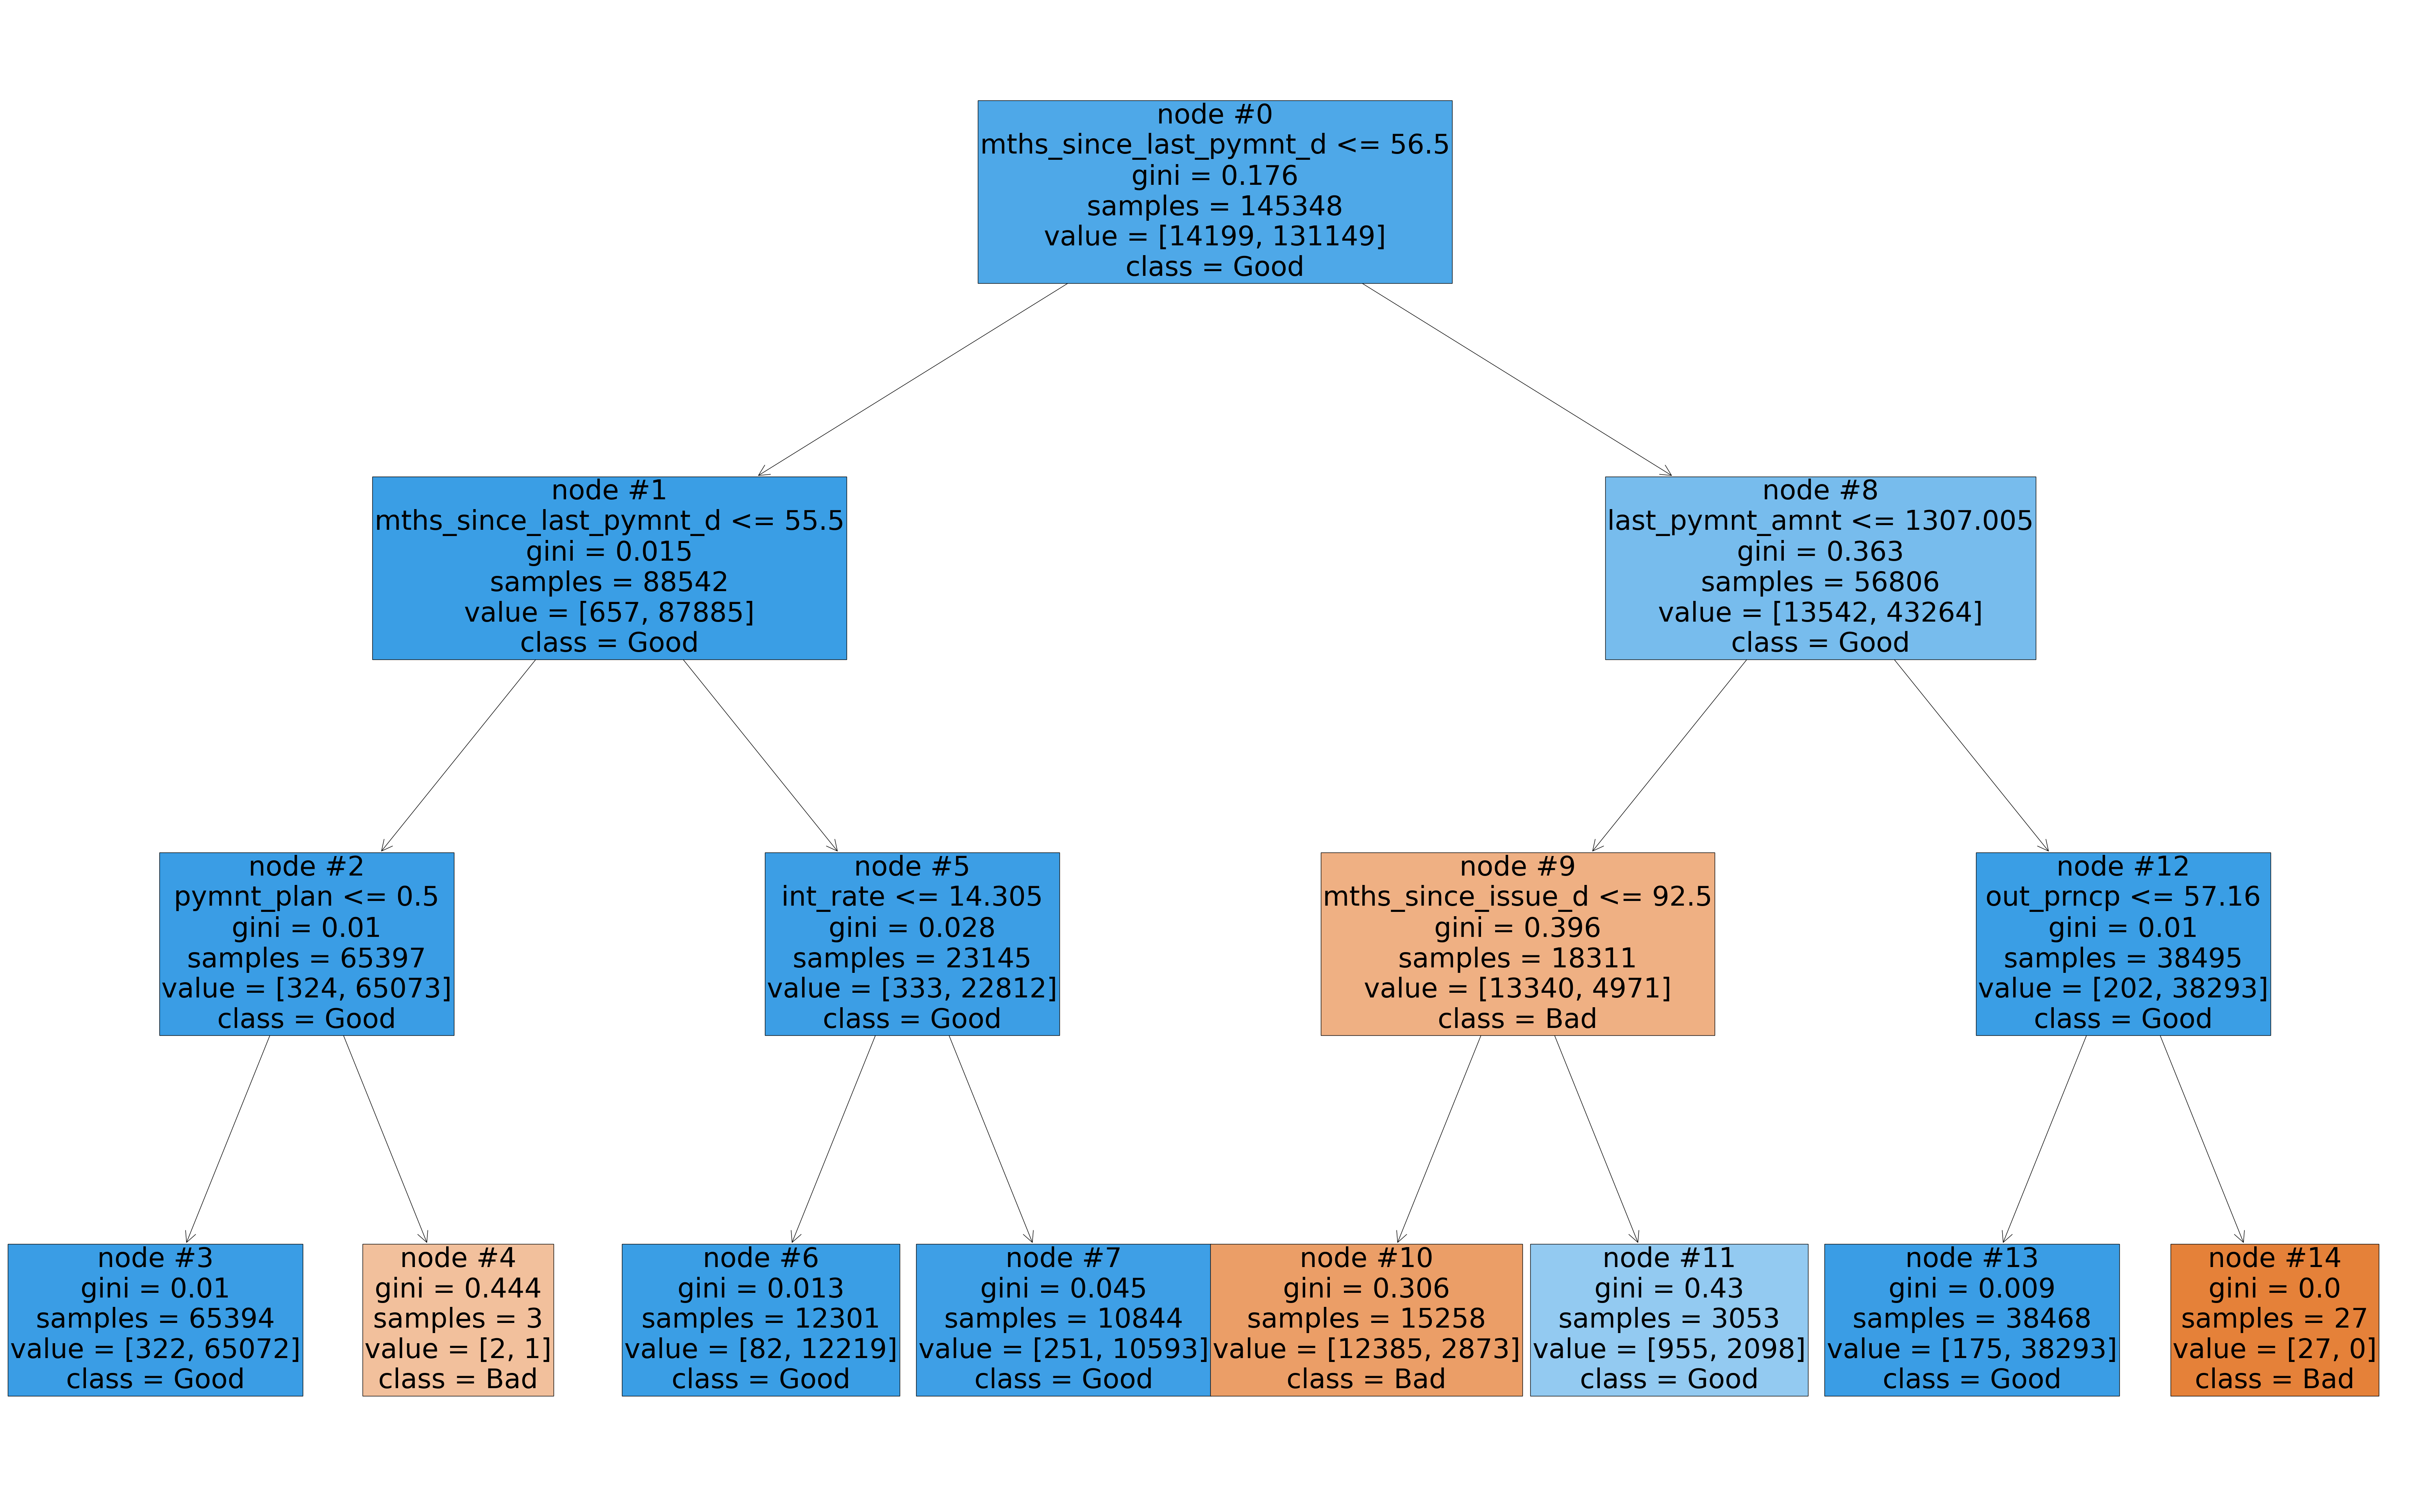

In [50]:
import matplotlib.pyplot as plt 
fig = plt.figure(figsize=(80, 50))
_ = tree.plot_tree(clf, 
                   feature_names=df.columns[:-1], 
                   class_names=['Bad', 'Good'], 
                   filled=True, 
                   fontsize=50,  # Increase the font size of the text in the nodes
                   node_ids=True)  # Show the IDs of the nodes
plt.savefig('tree.png', bbox_inches='tight')


In [37]:
from sklearn.metrics import classification_report


# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85      3625
           1       0.99      0.98      0.98     32713

    accuracy                           0.97     36338
   macro avg       0.90      0.93      0.91     36338
weighted avg       0.97      0.97      0.97     36338



In [38]:
from sklearn.metrics import roc_curve

# Compute the FPR and TPR for different thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [39]:
from sklearn.metrics import roc_auc_score

# Compute the AUC-ROC
auc_roc = roc_auc_score(y_test, y_pred)

In [40]:
auc_roc

0.925438449546052

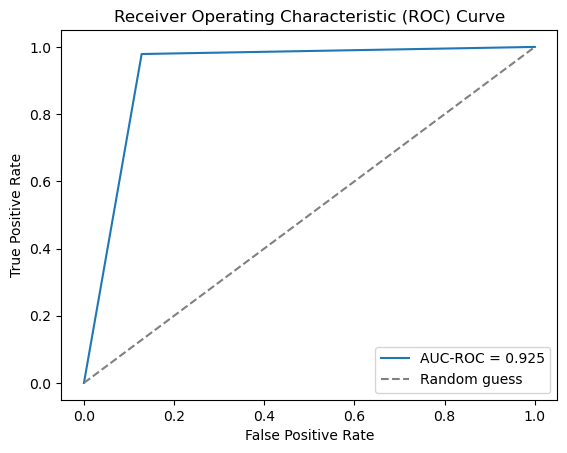

In [41]:
# Plot the ROC curve
plt.plot(fpr, tpr, label=f'AUC-ROC = {auc_roc:.3f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()